# Question Q8

*Question*: Who is actively addressing the requirements of ML-enabled system projects in your organization?

*Answer Type*: Multiple Option and Free Field

*Options*: [Project Lead / Project Manager, Business Analyst, Requirements Engineer, Solution Architect, Data Scientist, Developer, Test Manager / Tester, Other who?]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In this research, we conservatively considered those who fully completed the survey. So, we discarded suspended submissions.

In [3]:
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
who_addressing = {
    'Q8_ML_Addressing_Project_Lead': 'Project Lead',
    'Q8_ML_Addressing_Business_Analyst': 'Business Analyst',
    'Q8_ML_Addressing_Requirement_Engineer': 'Requirements Engineer',
    'Q8_ML_Addressing_Solution_Architect': 'Solution Architect',
    'Q8_ML_Addressing_Data_Scientist': 'Data Scientist',
    'Q8_ML_Addressing_Developer': 'Developer',
    'Q8_ML_Addressing_Tester': 'Tester',
    'Q8_ML_Addressing_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q8_ML_Addressing_Project_Lead', 'Q8_ML_Addressing_Business_Analyst',
                  'Q8_ML_Addressing_Requirement_Engineer', 'Q8_ML_Addressing_Solution_Architect',
                  'Q8_ML_Addressing_Data_Scientist', 'Q8_ML_Addressing_Developer',
                  'Q8_ML_Addressing_Tester', 'Q8_ML_Addressing_Others', 'Q8_ML_Addressing_Others_Free']].head()

,Q8_ML_Addressing_Project_Lead,Q8_ML_Addressing_Business_Analyst,Q8_ML_Addressing_Requirement_Engineer,Q8_ML_Addressing_Solution_Architect,Q8_ML_Addressing_Data_Scientist,Q8_ML_Addressing_Developer,Q8_ML_Addressing_Tester,Q8_ML_Addressing_Others,Q8_ML_Addressing_Others_Free
0,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99
1,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,quoted,not quoted,not quoted,quoted,quoted,quoted,not quoted,not quoted,-99
4,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99


In [6]:
indexes = []
values = []
chart_positions = []
for who in who_addressing:
    indexes.append(who_addressing[who])
    values.append(dataframe_obj.df[who].value_counts()['quoted'])
    chart_positions.append(1 if '_Others' not in who else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['Q8_ML_Addressing_Project_Lead'] == 'quoted' or row['Q8_ML_Addressing_Business_Analyst'] == 'quoted' or row['Q8_ML_Addressing_Requirement_Engineer'] == 'quoted' or row['Q8_ML_Addressing_Solution_Architect'] == 'quoted' or row['Q8_ML_Addressing_Data_Scientist'] == 'quoted' or row['Q8_ML_Addressing_Developer'] == 'quoted' or row['Q8_ML_Addressing_Tester'] == 'quoted' or row['Q8_ML_Addressing_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
q8_plot = PlotUtils(pd.DataFrame(
    data={'Addressing': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

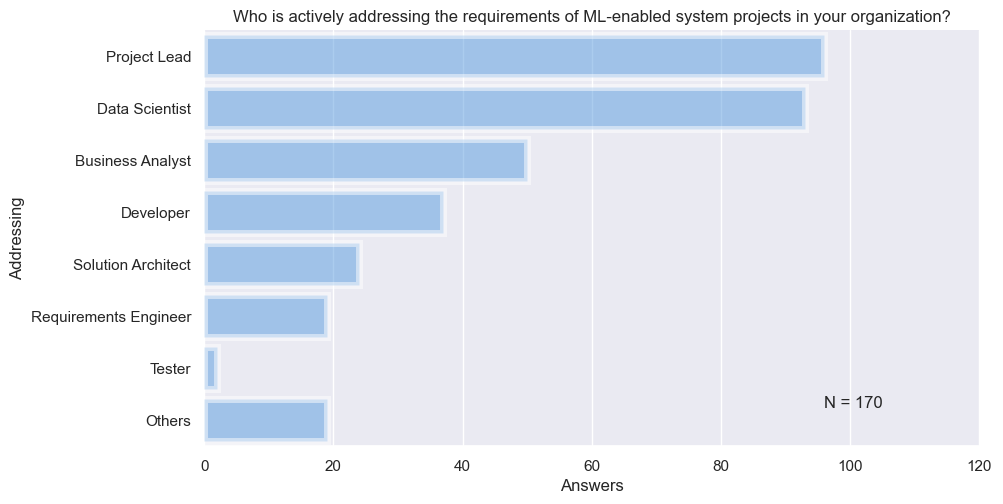

In [9]:
q8_plot.single_barplot(x_axis="Answers", y_axis="Addressing",
                       title="Who is actively addressing the requirements of ML-enabled system projects in your organization?",
                       x_label="Answers", y_label="Addressing", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
who_addressing_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q8_ML_Addressing_Others_Free'])))
who_addressing_free = list(filter(lambda a: str(a) != '-66', who_addressing_free))
who_addressing_free = list(filter(lambda a: str(a) != 'nan', who_addressing_free))

In [11]:
who_addressing_words = format_wordcloud_text(texts=who_addressing_free, use_sep=False)

In [12]:
# plot object
q8_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(who_addressing_words.keys()), 'Weight': list(who_addressing_words.values())}
))

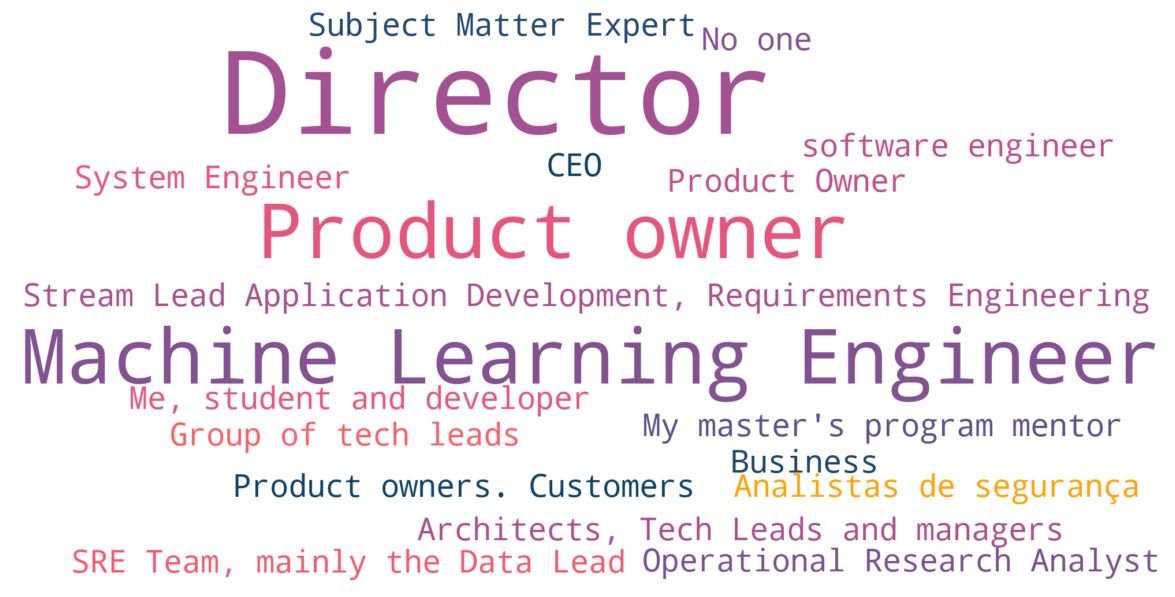

In [13]:
q8_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [14]:
prefix = "Q8_ML_Addressing_"

In [15]:
# the possible answers are the ones in columns
valid_options_list = [who_addressing_column.split(prefix)[1] for who_addressing_column in who_addressing]

In [16]:
valid_options_list

['Project_Lead',
 'Business_Analyst',
 'Requirement_Engineer',
 'Solution_Architect',
 'Data_Scientist',
 'Developer',
 'Tester',
 'Others']

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'None' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [18]:
valid_answers_list[0]

['Developer', 'Tester']

In [19]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [20]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [21]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [who_addressing[prefix + idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [22]:
values = [100 * v for v in values]

In [23]:
# plot object for bootstrapped data
q8_boot_plot = PlotUtils(pd.DataFrame(
    data={'Addressing': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

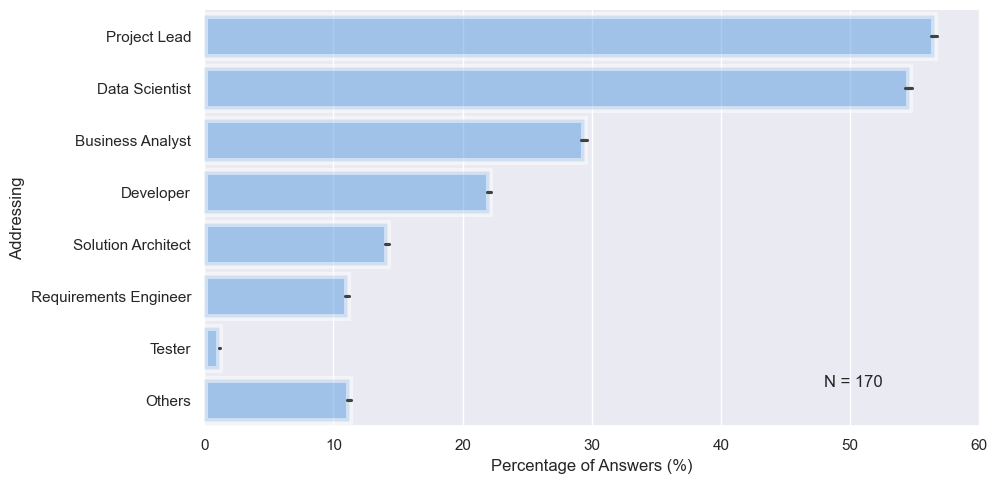

In [24]:
q8_boot_plot.single_barplot(x_axis="Value", y_axis="Addressing", 
                       # title="Bootstrapping - 95% Confidence \n Who is actively addressing the requirements of ML-enabled system projects in your organization?",
                       title="",
                       x_label="Percentage of Answers (%)", y_label="Addressing", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
tuples = []
for idx in bootstrapped_dict_data:
    tuples.append((idx, bootstrapped_dict_data[idx]['confidence'][1]))
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Project_Lead:(0.562627100467034, 0.5650705882352942, 0.5675140760035544)
Business_Analyst:(0.2918731088684204, 0.29408235294117646, 0.29629159701393254)
Requirement_Engineer:(0.10910677030078483, 0.11054117647058824, 0.11197558264039165)
Solution_Architect:(0.13993957114326935, 0.14159411764705881, 0.14324866415084828)
Data_Scientist:(0.5428183929253232, 0.5452470588235294, 0.5476757247217356)
Developer:(0.2184289681183848, 0.22041176470588233, 0.22239456129337987)
Tester:(0.011277636842086807, 0.011770588235294118, 0.012263539628501428)
Others:(0.11083044653968925, 0.11226470588235295, 0.11369896522501664)


In [26]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Project_Lead:: P = 56.507 [56.263, 56.751]
Business_Analyst:: P = 29.408 [29.187, 29.629]
Requirement_Engineer:: P = 11.054 [10.911, 11.198]
Solution_Architect:: P = 14.159 [13.994, 14.325]
Data_Scientist:: P = 54.525 [54.282, 54.768]
Developer:: P = 22.041 [21.843, 22.239]
Tester:: P = 1.177 [1.128, 1.226]
Others:: P = 11.226 [11.083, 11.37]
